![bees](bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `species_num` | The number of different bee species in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plant. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [64]:
import pandas as pd

# add na_values="None" to add compatibility with pandas 1.5.*
data = pd.read_csv("data/plants_and_bees.csv", na_values="None")
data.head()

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,NaN,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,NaN,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,NaN,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,NaN,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,NaN,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0


### Which plants are preferred by native vs non-native bee species?

In order to answer this question, we must normalize the data by the number of samples taken for each plant species. This will allow us to compare the relative frequency of each plant species in the samples.

In [65]:
# Start coding here
import matplotlib.pyplot as plt
import seaborn as sns

native = data[(data["native_or_non"] == "native") & (~data["plant_species"].isna())]
non_native = data[(data["native_or_non"] == "non-native") & (~data["plant_species"].isna())]

# number of bees per species
native_species_count = native["plant_species"].value_counts()
non_native_species_count = non_native["plant_species"].value_counts()

# number of samples unique per species
native_samples_count = native.groupby("plant_species")["sample_id"].nunique()
non_native_samples_count = non_native.groupby("plant_species")["sample_id"].nunique()

# relative frequency of bees per species
native_species_freq = native_species_count / native_samples_count
non_native_species_freq = non_native_species_count / non_native_samples_count

# convert to dataframe
native_species_freq = pd.DataFrame(native_species_freq.sort_values(ascending=False), columns=["Relative Frequency"])
non_native_species_freq = pd.DataFrame(non_native_species_freq.sort_values(ascending=False), columns=["Relative Frequency"])

# display side to side
preferred = pd.concat(
    [native_species_freq[:1], non_native_species_freq[:1]], 
    axis=0, 
    keys=["Native Bees", "Non-Native Bees"]).reset_index(1).rename(columns={"plant_species": "Plant Species"})
preferred.head()

,Plant Species,Relative Frequency
Native Bees,Rudbeckia hirta,9.833333
Non-Native Bees,Cichorium intybus,12.500000


How we can to see en before table the speceis of plant that are preferred by native bees is **Rudbeckia hirta** and the species of plant that are preferred by non-native bees is **Cichorium intybus**.


### A visualization of the distribution of bee and plant species across one of the samples.


In [66]:
# select a random sample
import ipywidgets as widgets
from ipywidgets import interact

# drop na of plant species
data_samples = data.dropna(subset=["plant_species"])

# create selection slider
selection = widgets.SelectionSlider(
    options=data_samples["sample_id"].unique(),
    value=data_samples["sample_id"].sample().values[0],
    description="Sample ID",
)

@interact(sample_id=selection)
def show_sample(sample_id):
    # graph sample
    sample = data_samples[data_samples["sample_id"] == sample_id]
    sns.countplot(x="plant_species", data=sample, color="green")
    plt.title("Plant Species")
    plt.xticks(rotation=45)
    plt.show()

interactive(children=(SelectionSlider(description='Sample ID', index=22, options=(17406, 17409, 17412, 17415, …

### Select the top three plant species you would recommend to the agency to support native bees.

The top three plant species that I would recommend to the agency to support native bees are **Rudbeckia Hirta**, **Rubeckia Triloba** and **Asclepias Tuberosa**.

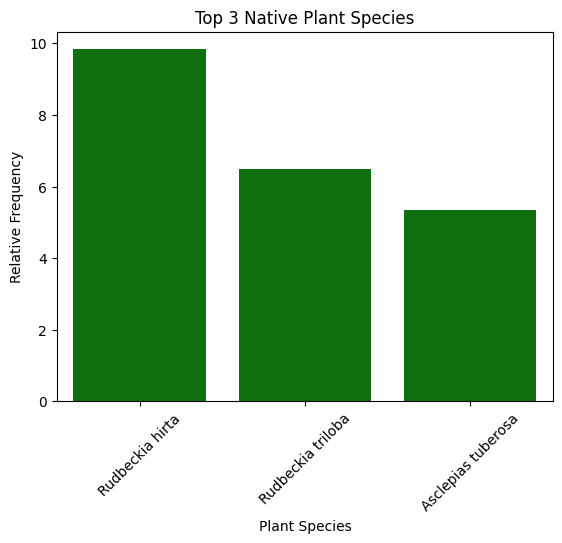

In [67]:
top3_native = native_species_freq[:3]
# graph top 3 native species
sns.barplot(x=top3_native.index, y="Relative Frequency", data=top3_native, color="green")
# x-axis label
plt.xlabel("Plant Species")
plt.title("Top 3 Native Plant Species")
plt.xticks(rotation=45)
plt.show()
